## Classifying ADHD Using Functional Connectivity and Neural Networks
**This is a step-by-step guide to using a simple neural network model for functional connectivity-based classification.**
<br>
In this experiment I will show how we can use a neural network model to classify functional connectivity data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting

In [2]:
#Fixing seed for reproducibility
np.random.seed(0)

In [3]:
#Loading data
from nilearn import datasets
num = 30
adhd_data = datasets.fetch_adhd(n_subjects=num)

[get_dataset_dir] Dataset found in C:\Users\1998a\nilearn_data\adhd

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7807/adhd40_3699991.tgz ...

[_chunk_report_] Downloaded 507904 of 41518251 bytes (1.2%%,  1.4min remaining)

[_chunk_report_] Downloaded 5496832 of 41518251 bytes (13.2%%,   14.2s remaining)

[_chunk_report_] Downloaded 6283264 of 41518251 bytes (15.1%%,   18.1s remaining)

[_chunk_report_] Downloaded 7979008 of 41518251 bytes (19.2%%,   18.0s remaining)

[_chunk_report_] Downloaded 10362880 of 41518251 bytes (25.0%%,   16.5s remaining)

[_chunk_report_] Downloaded 11001856 of 41518251 bytes (26.5%%,   18.1s remaining)

[_chunk_report_] Downloaded 12328960 of 41518251 bytes (29.7%%,   17.9s remaining)

[_chunk_report_] Downloaded 14630912 of 41518251 bytes (35.2%%,   16.1s remaining)

[_chunk_report_] Downloaded 15081472 of 41518251 bytes (36.3%%,   17.2s remaining)

[_chunk_report_] Downloaded 15990784 of 41518251 bytes (38.5%%,   17.3s remaining)

[_chunk_report_] Downloaded 19308544 of 41518251 bytes (46.5%%,   13.7s remaining)

[_chunk_report_] Downloaded 24633344 of 41518251 bytes (59.3%%,    8.9s remaining)

[_chunk_report_] Downloaded 29704192 of 41518251 bytes (71.5%%,    5.5s remaining)

[_chunk_report_] Downloaded 32448512 of 41518251 bytes (78.2%%,    4.2s remaining)

[_chunk_report_] Downloaded 37240832 of 41518251 bytes (89.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 40247296 of 41518251 bytes (96.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (18 seconds, 0 min)

[uncompress_file] Extracting data from 
C:\Users\1998a\nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3699991.tgz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7808/adhd40_3884955.tgz ...

[_chunk_report_] Downloaded 2957312 of 32108848 bytes (9.2%%,   10.3s remaining)

[_chunk_report_] Downloaded 6455296 of 32108848 bytes (20.1%%,    8.4s remaining)

[_chunk_report_] Downloaded 9986048 of 32108848 bytes (31.1%%,    7.0s remaining)

[_chunk_report_] Downloaded 13336576 of 32108848 bytes (41.5%%,    5.9s remaining)

[_chunk_report_] Downloaded 16703488 of 32108848 bytes (52.0%%,    4.8s remaining)

[_chunk_report_] Downloaded 19996672 of 32108848 bytes (62.3%%,    3.7s remaining)

[_chunk_report_] Downloaded 23363584 of 32108848 bytes (72.8%%,    2.7s remaining)

[_chunk_report_] Downloaded 26804224 of 32108848 bytes (83.5%%,    1.6s remaining)

[_chunk_report_] Downloaded 30466048 of 32108848 bytes (94.9%%,    0.5s remaining)

[fetch_single_file]  ...done. (10 seconds, 0 min)

[uncompress_file] Extracting data from 
C:\Users\1998a\nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3884955.tgz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7809/adhd40_3902469.tgz ...

[_chunk_report_] Downloaded 3571712 of 39415752 bytes (9.1%%,   10.5s remaining)

[_chunk_report_] Downloaded 8126464 of 39415752 bytes (20.6%%,    7.9s remaining)

[_chunk_report_] Downloaded 12591104 of 39415752 bytes (31.9%%,    6.5s remaining)

[_chunk_report_] Downloaded 17121280 of 39415752 bytes (43.4%%,    5.3s remaining)

[_chunk_report_] Downloaded 21217280 of 39415752 bytes (53.8%%,    4.3s remaining)

[_chunk_report_] Downloaded 25862144 of 39415752 bytes (65.6%%,    3.2s remaining)

[_chunk_report_] Downloaded 30932992 of 39415752 bytes (78.5%%,    1.9s remaining)

[_chunk_report_] Downloaded 35921920 of 39415752 bytes (91.1%%,    0.8s remaining)

[fetch_single_file]  ...done. (9 seconds, 0 min)

[uncompress_file] Extracting data from 
C:\Users\1998a\nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3902469.tgz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7810/adhd40_3994098.tgz ...

[_chunk_report_] Downloaded 3719168 of 59297020 bytes (6.3%%,   15.7s remaining)

[_chunk_report_] Downloaded 8118272 of 59297020 bytes (13.7%%,   12.9s remaining)

[_chunk_report_] Downloaded 12083200 of 59297020 bytes (20.4%%,   11.9s remaining)

[_chunk_report_] Downloaded 15147008 of 59297020 bytes (25.5%%,   11.8s remaining)

[_chunk_report_] Downloaded 18743296 of 59297020 bytes (31.6%%,   10.9s remaining)

[_chunk_report_] Downloaded 22257664 of 59297020 bytes (37.5%%,   10.1s remaining)

[_chunk_report_] Downloaded 25919488 of 59297020 bytes (43.7%%,    9.1s remaining)

[_chunk_report_] Downloaded 29622272 of 59297020 bytes (50.0%%,    8.1s remaining)

[_chunk_report_] Downloaded 33333248 of 59297020 bytes (56.2%%,    7.1s remaining)

[_chunk_report_] Downloaded 37093376 of 59297020 bytes (62.6%%,    6.0s remaining)

[_chunk_report_] Downloaded 40763392 of 59297020 bytes (68.7%%,    5.0s remaining)

[_chunk_report_] Downloaded 44441600 of 59297020 bytes (74.9%%,    4.0s remaining)

[_chunk_report_] Downloaded 48259072 of 59297020 bytes (81.4%%,    3.0s remaining)

[_chunk_report_] Downloaded 52264960 of 59297020 bytes (88.1%%,    1.9s remaining)

[_chunk_report_] Downloaded 56483840 of 59297020 bytes (95.3%%,    0.8s remaining)

[fetch_single_file]  ...done. (16 seconds, 0 min)

[uncompress_file] Extracting data from 
C:\Users\1998a\nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3994098.tgz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7811/adhd40_4016887.tgz ...

[_chunk_report_] Downloaded 4169728 of 20157314 bytes (20.7%%,    4.0s remaining)

[_chunk_report_] Downloaded 8396800 of 20157314 bytes (41.7%%,    2.9s remaining)

[_chunk_report_] Downloaded 12451840 of 20157314 bytes (61.8%%,    1.9s remaining)

[_chunk_report_] Downloaded 16728064 of 20157314 bytes (83.0%%,    0.8s remaining)

[fetch_single_file]  ...done. (5 seconds, 0 min)

[uncompress_file] Extracting data from 
C:\Users\1998a\nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_4016887.tgz...

[uncompress_file] .. done.

In [4]:
adhd_data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [5]:
len(adhd_data['func'])

30

In [6]:
#Getting the functional files
func = adhd_data['func']
print(func[0])

C:\Users\1998a\nilearn_data\adhd\data\0010042\0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [29]:
#Using nilearn's individual component analysis for group level
from nilearn import decomposition

canica = decomposition.CanICA(n_components=15, mask_strategy='background')
canica.fit(func)

d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\Python Projects\N

CanICA(mask_strategy='background', memory=Memory(location=None),
       n_components=15)

In [30]:
components = canica.components_
print(f"Shape of ICA components: {components.shape}")

Shape of ICA components: (15, 89221)


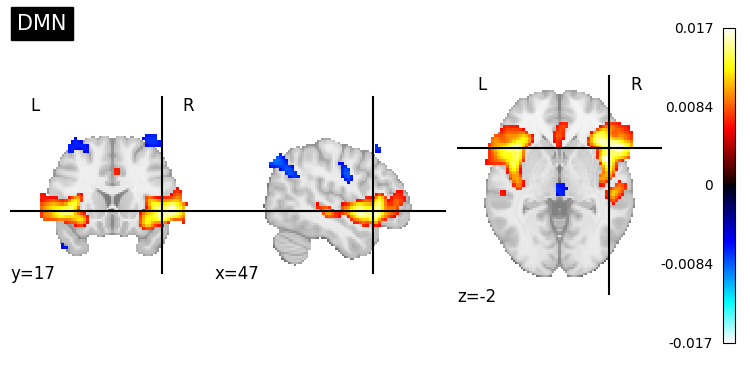

d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\numpy\ma\core.py:2846: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


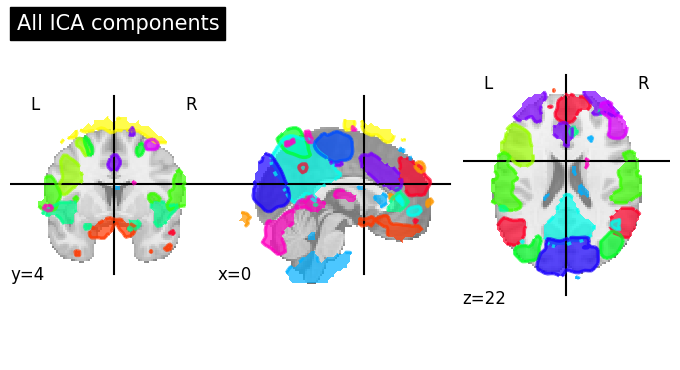

In [51]:
#Retrieving the components
components = canica.components_

#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting the default mode network (DMN) without region extraction
plotting.plot_stat_map(image.index_img(components_img, 7), title='DMN')
plotting.show()

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [59]:
# Plotting the default mode network (DMN) without region
plotting.plot_stat_map(
    image.index_img(components_img, 7),
    title='DMN',
    output_file='../assets/dmn_plot.png')
plotting.show()

In [60]:
#Plotting all the components
plotting.plot_prob_atlas(
    components_img,
    title='All ICA components',
    output_file='../assets/ica_plot.png')
plotting.show()

d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\numpy\ma\core.py:2846: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


In [32]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6,
                         standardize=False, detrend=True,
                         t_r=2.5, low_pass=0.1,
                         high_pass=0.01)



#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series)    
    sites.append(phenotypic['site'])
    labels.append(phenotypic['adhd'])

In [33]:
#Comparing the three types of functional connectivity between the regions of interest
from nilearn.connectome import ConnectivityMeasure

connectivity_biomarkers = {}

kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['tangent'].shape[1]))

120 correlation biomarkers for each subject.


In [34]:
#Stratifying the data to use for comparison

from sklearn.model_selection import StratifiedKFold

classes = ['{0}{1}'.format(site_name, adhd_label)
           for site_name, adhd_label in zip(sites, labels)]
cv = StratifiedKFold(n_splits=3)

In [35]:
#Classifying using the connectivity coefficients and linear support vector
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                                connectivity_biomarkers[kind],
                                y=labels,
                                cv=cv,
                                groups=labels,
                                scoring='accuracy',
                                )
    mean_scores.append(cv_scores.mean())

d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\model_selection\_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\model_selection\_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\model_selection\_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


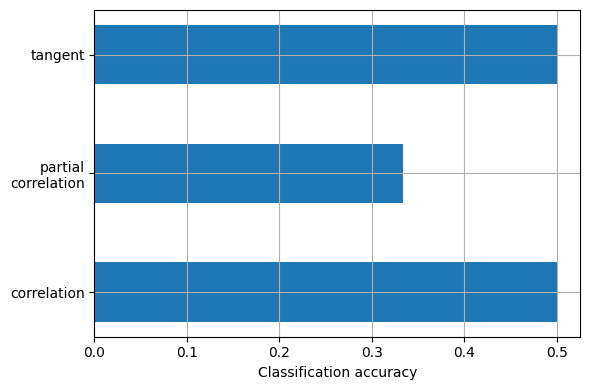

In [61]:
#Visualizing results and accuracy
from nilearn.plotting import show

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.savefig("../assets/Classification_Accuracy.png")
plt.tight_layout()

show()

C:\Users\1998a\AppData\Local\Temp\ipykernel_40608\3894724262.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


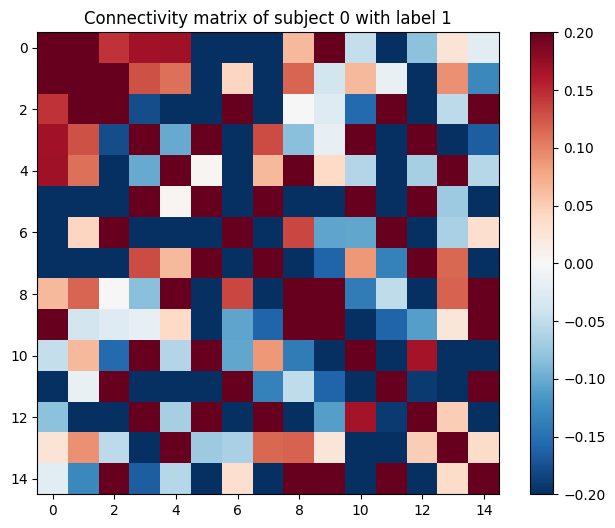

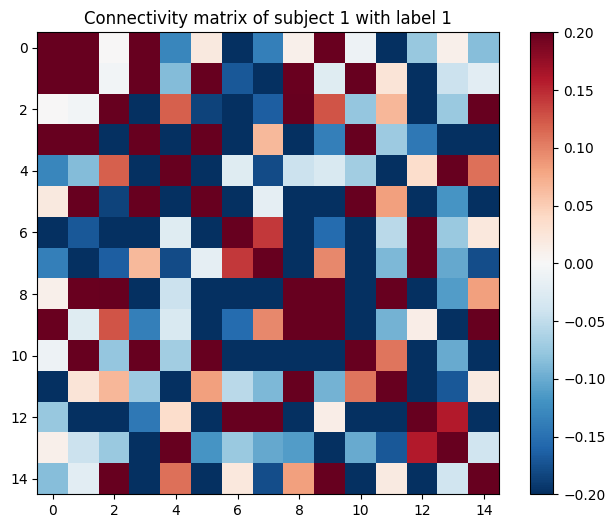

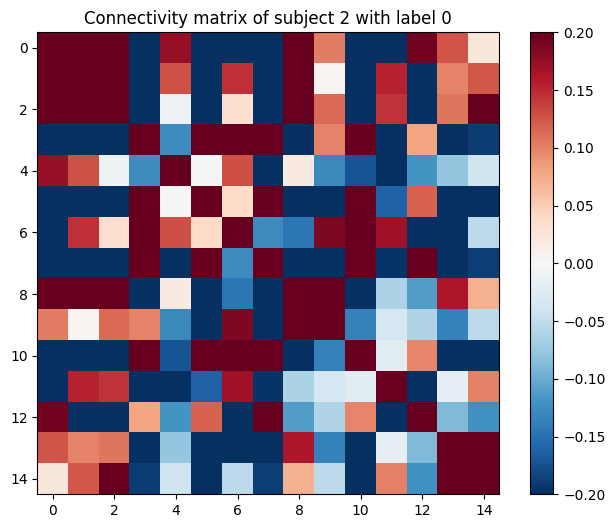

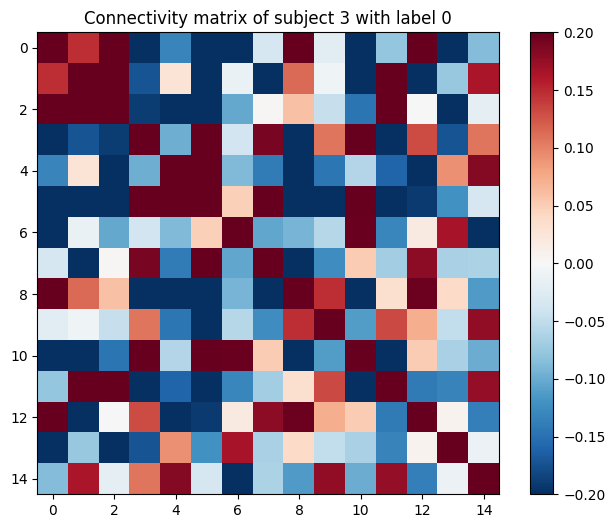

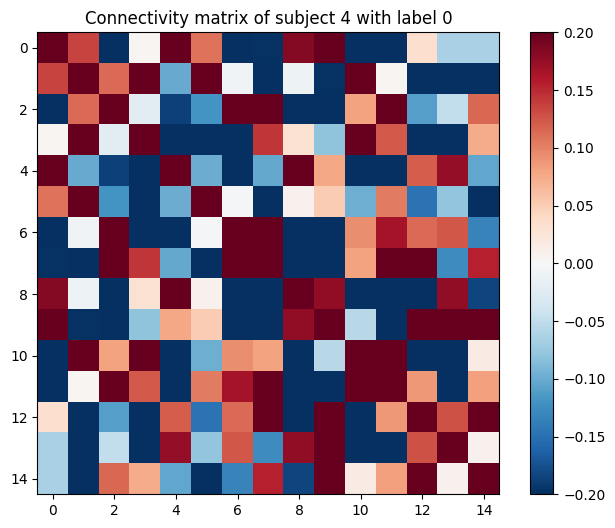

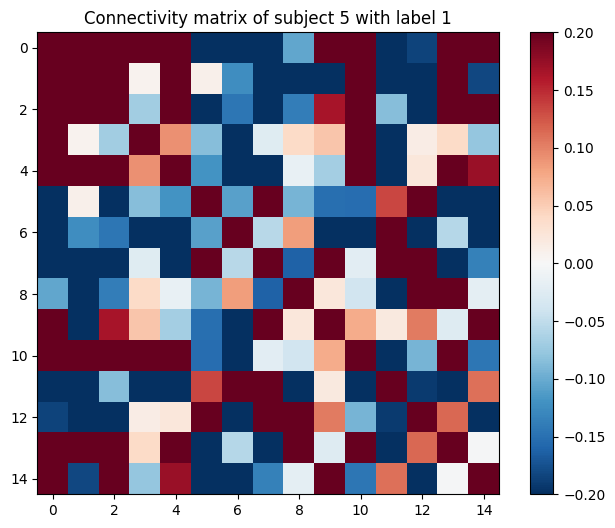

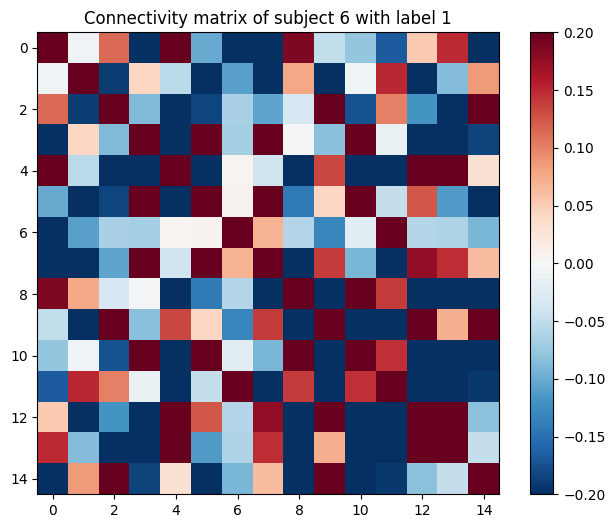

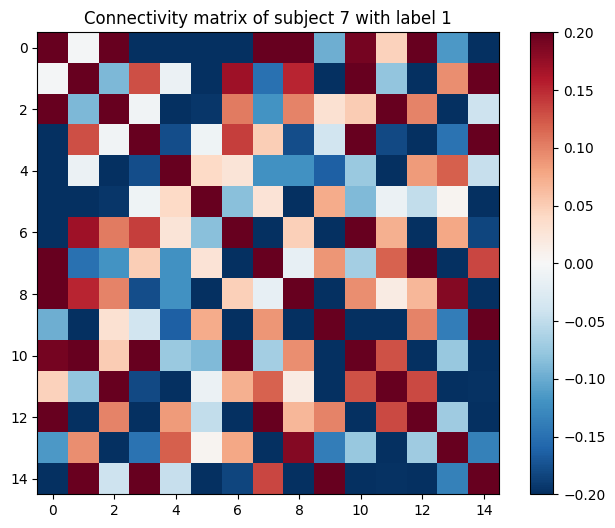

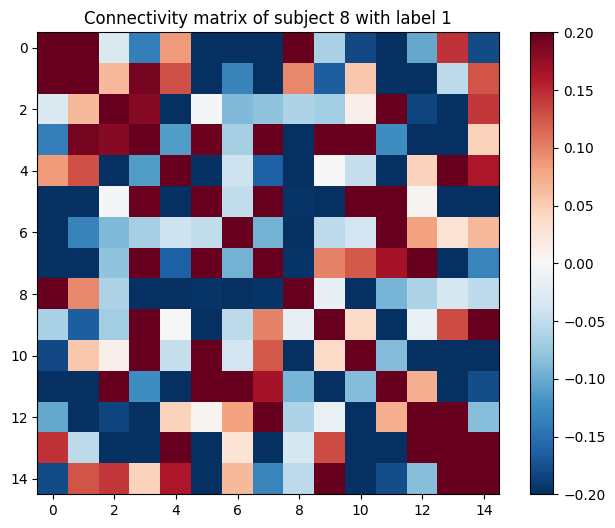

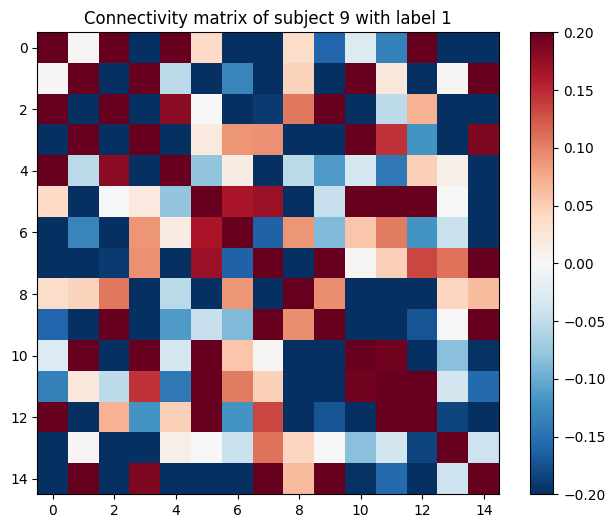

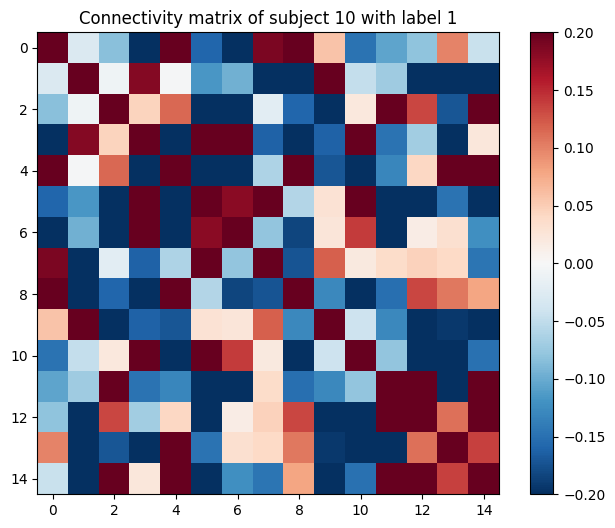

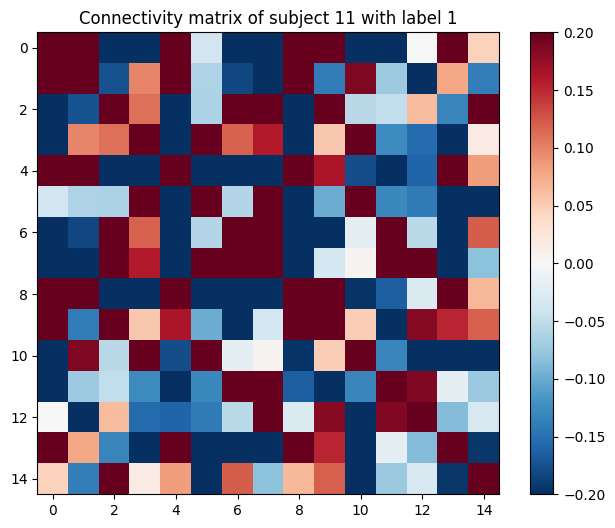

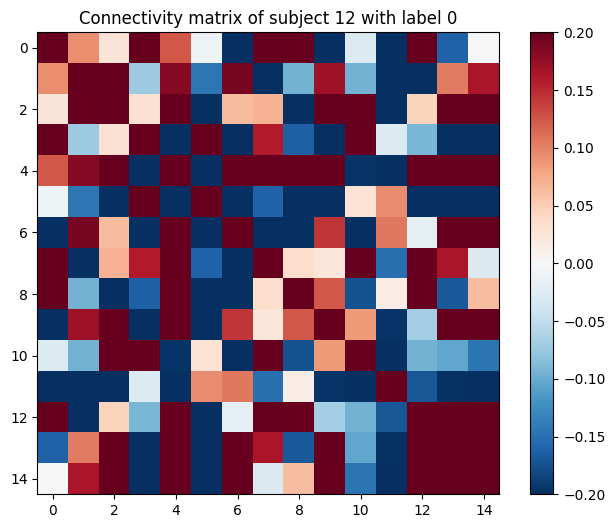

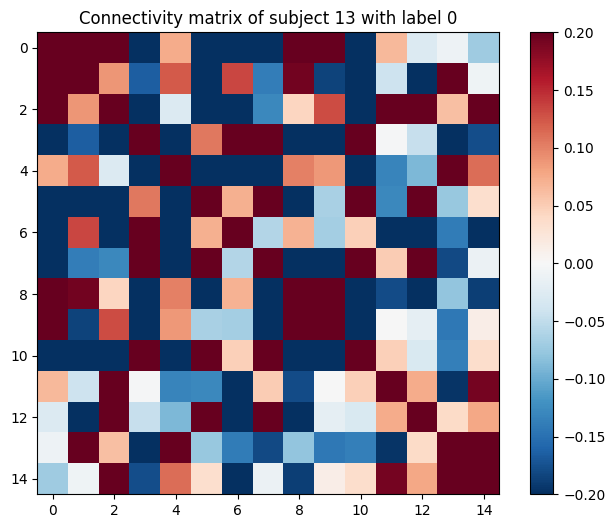

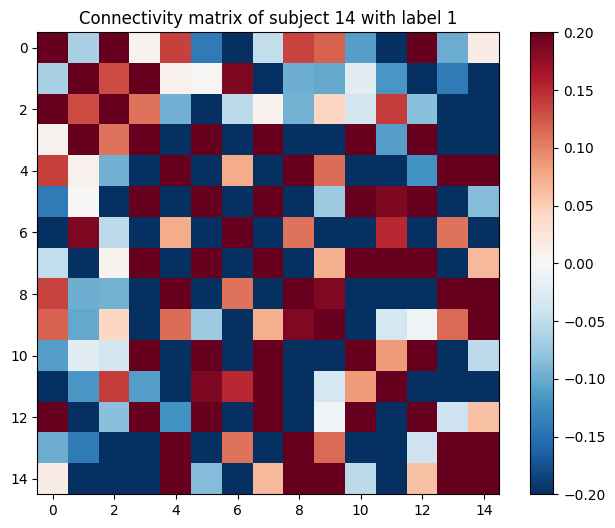

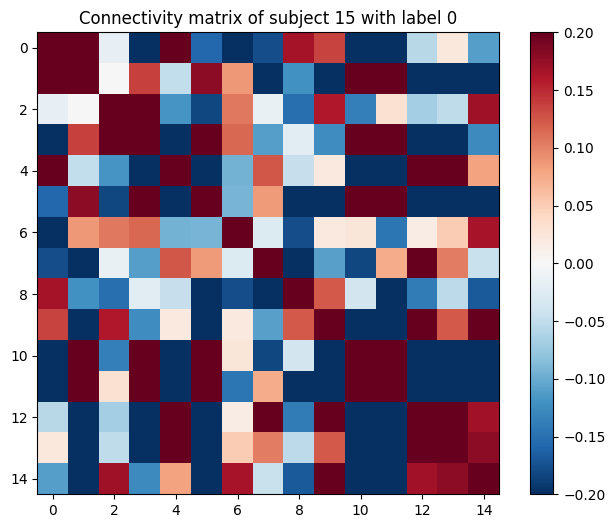

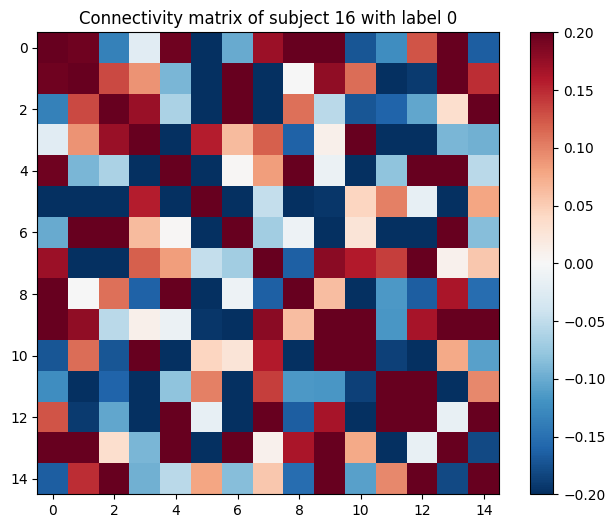

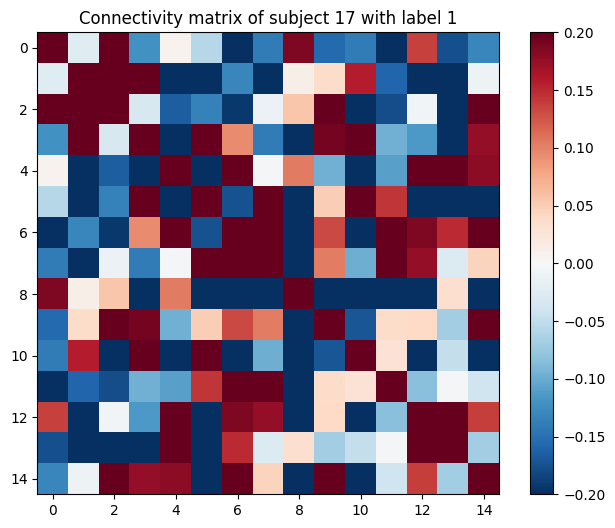

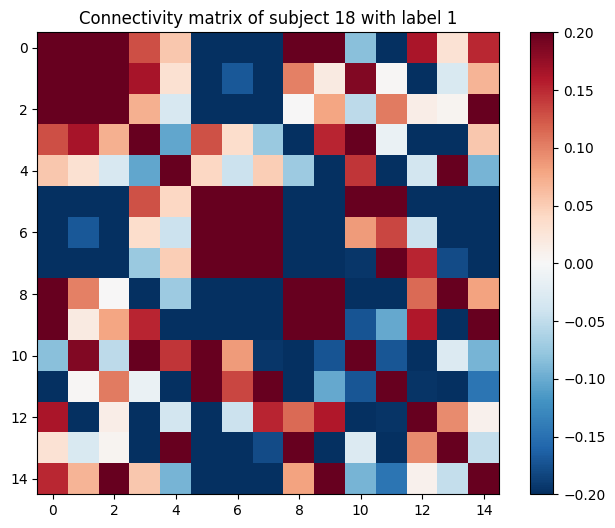

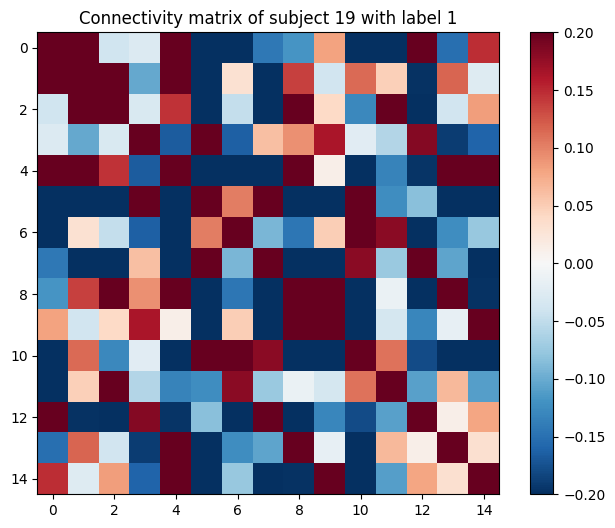

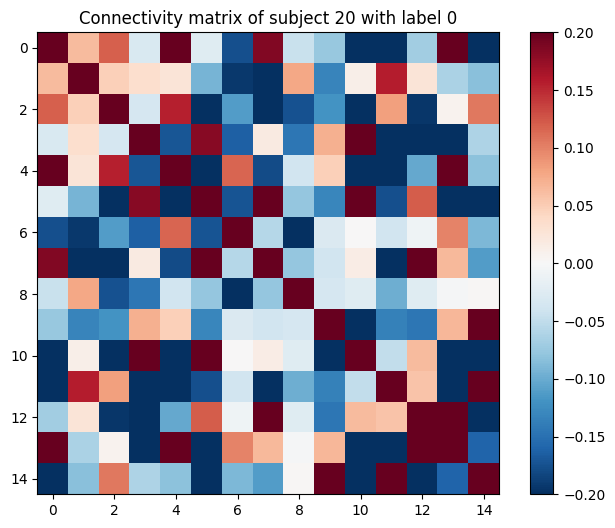

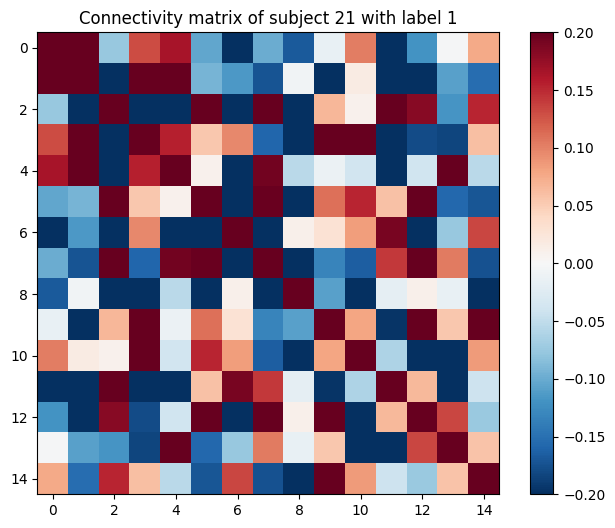

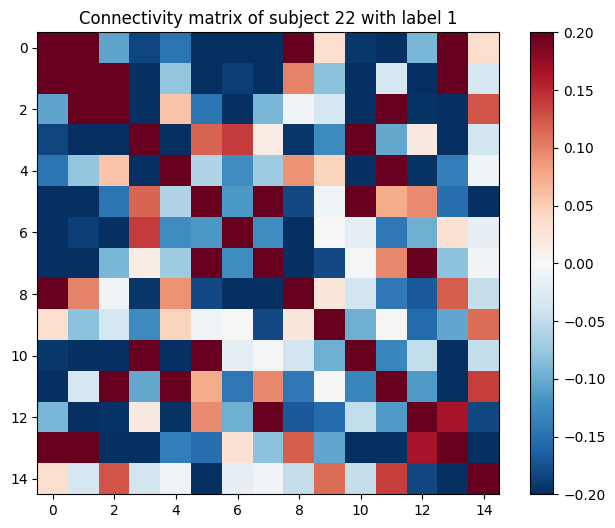

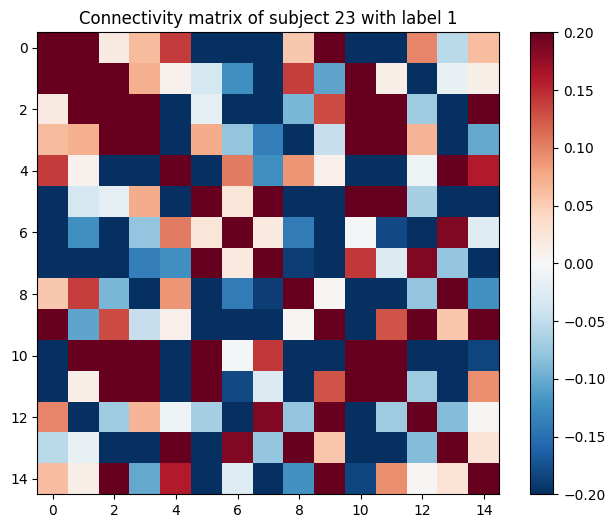

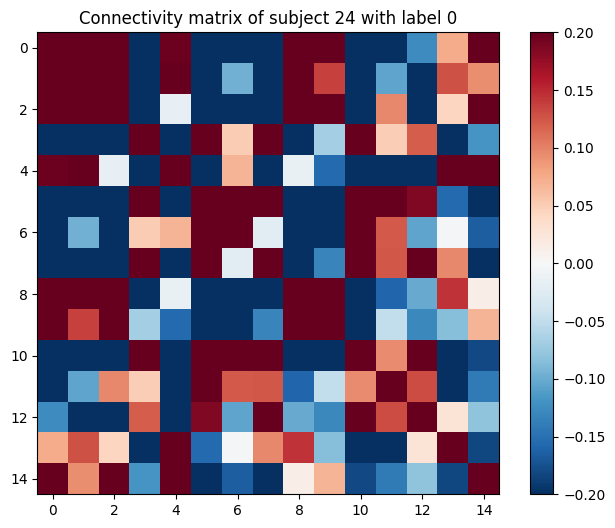

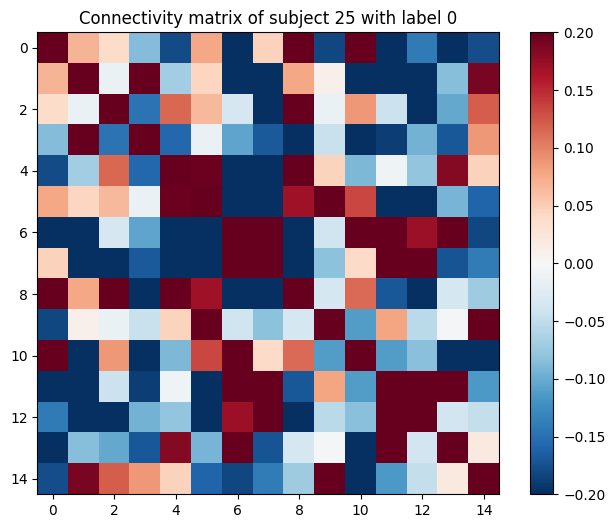

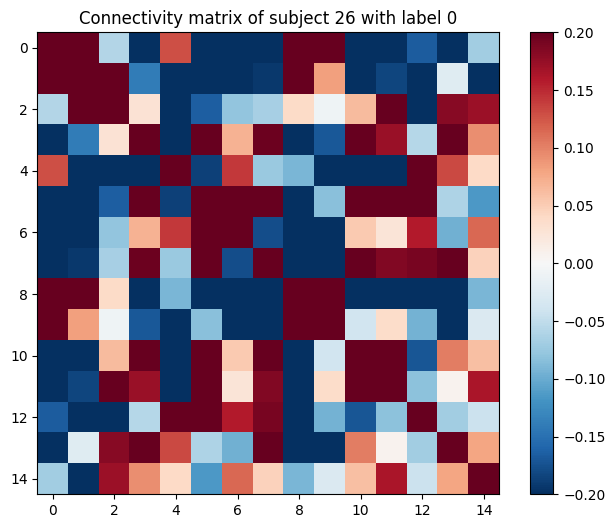

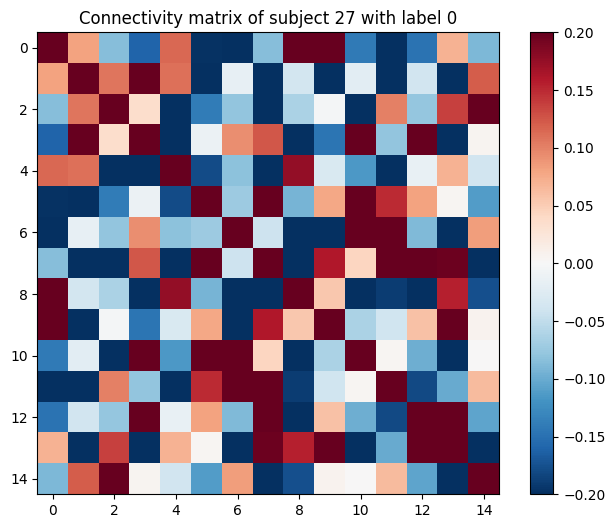

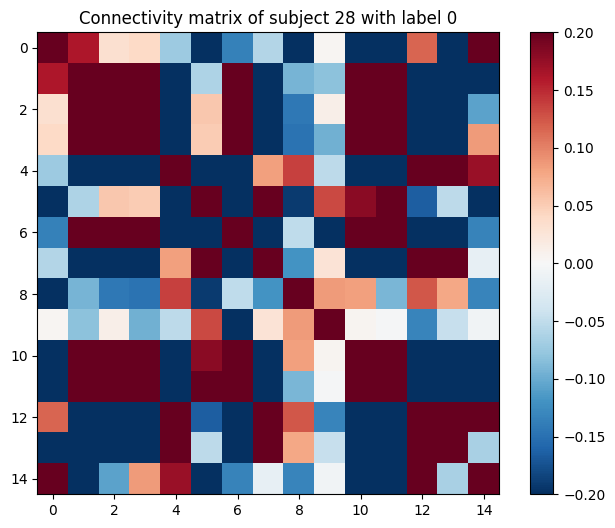

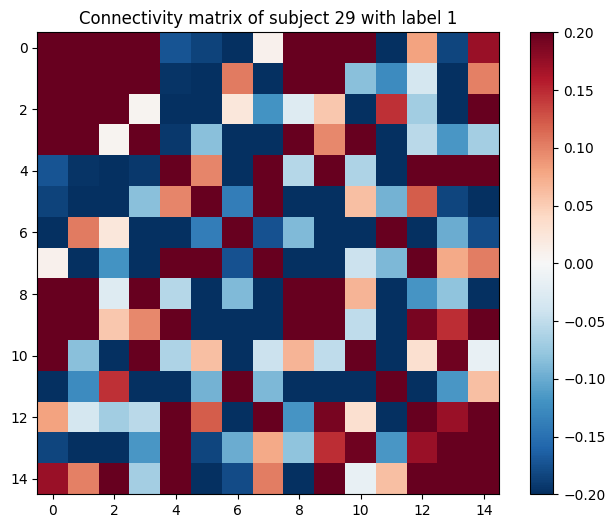

In [37]:
#Displaying the connectomes for the most accurate kind of functional connectivity
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects)


for i in range(30):
    plt.figure(figsize=(8,6))
    plt.imshow(correlation_matrices[i], vmax=.20, vmin=-.20, cmap='RdBu_r')
    plt.colorbar()
    plt.title('Connectivity matrix of subject {} with label {}'.format(i, labels[i]))

In [38]:
#Separating the correlation matrices between treatment and control subjects
adhd_correlations = []
control_correlations = []
for i in range(30):
    if labels[i] == 1:
        adhd_correlations.append(correlation_matrices[i])
    else:
        control_correlations.append(correlation_matrices[i])

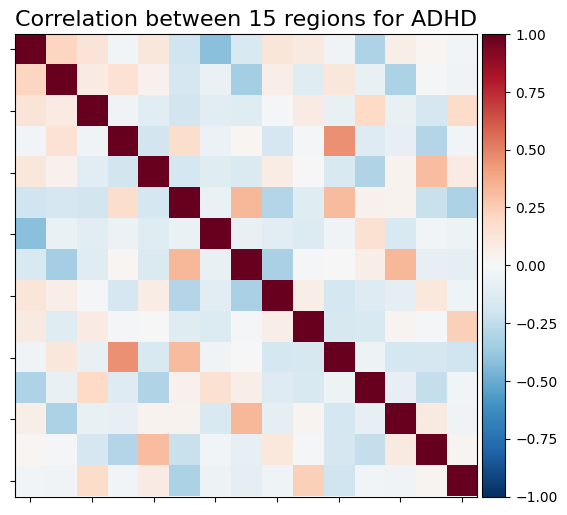

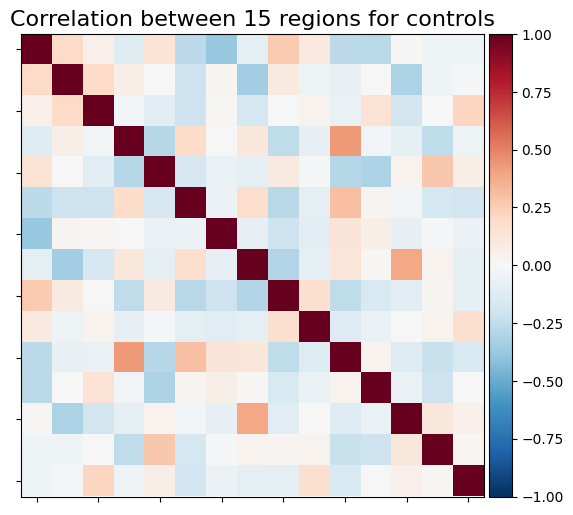

In [63]:
#Getting the mean correlation matrix across all treatment subjects
mean_correlations_adhd = np.mean(adhd_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])

#Getting the mean correlation matrix across all control subjects
mean_correlations_control = np.mean(control_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])

#Visualizing the mean correlation
plotting.plot_matrix(mean_correlations_adhd, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 15 regions for ADHD')

plotting.plot_matrix(mean_correlations_control, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 15 regions for controls')

#Getting the center coordinates from the component decomposition to use as atlas labels
coords = plotting.find_probabilistic_atlas_cut_coords(components_img)

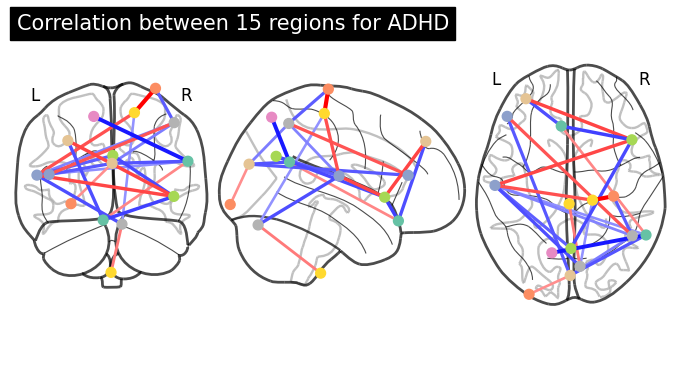

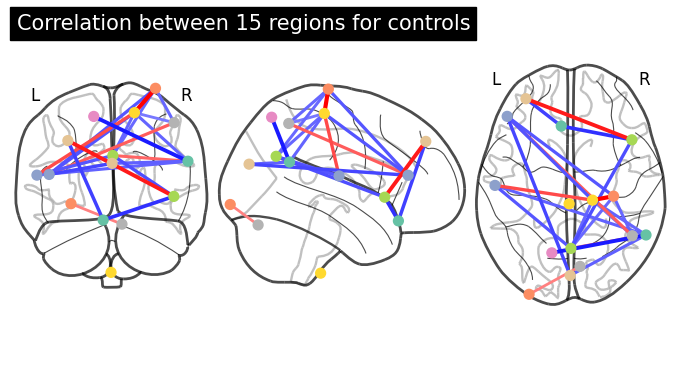

In [40]:
#Plotting the connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlations_adhd, coords,
                         edge_threshold="80%", title='Correlation between 15 regions for ADHD')

plotting.plot_connectome(mean_correlations_control, coords,
                         edge_threshold="80%", title='Correlation between 15 regions for controls')
plotting.show()

In [41]:
#Creating the equivalent interactive visualization
view = plotting.view_connectome(mean_correlations_adhd, coords, edge_threshold='80%')
view

In [42]:
view = plotting.view_connectome(mean_correlations_control, coords, edge_threshold='80%')
view

In [43]:
#Splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(connectivity_biomarkers['correlation'], labels, test_size=0.3)

In [44]:
#Creating the classification model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='tanh', kernel_initializer='random_normal', input_shape=connectivity_biomarkers['correlation'].shape[1:]))
#Second  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compiling the model
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
#Fitting the model
classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step - accuracy: 0.6190 - loss: 0.6931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6190 - loss: 0.6931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5714 - loss: 0.6931
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5714 - loss: 0.6931
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5714 - loss: 0.6931
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5714 - loss: 0.6930
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5714 - l

In [47]:
#Determining accuracy on training
eval_model=classifier.evaluate(np.array(X_train), np.array(y_train))
eval_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5714 - loss: 0.6901


[0.6900985240936279, 0.5714285969734192]

In [64]:
#Making the classification and determining accuracy
y_pred=classifier.predict(X_test,batch_size=24)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0 4]
 [0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python Projects\Neural-Networks-for-fMRI-Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av